# DATA EXPLORATION

## Wczytanie pakietów, ustawień i danych

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

from IPython.display import display
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../data/preprocessed/preprocessed_data.csv')

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age_dependency_ratio,835.0,66.218443,8.854913,41.20,60.900000,65.900000,72.000000,1.309000e+02
NO2_avg_conc,1.0,35.000000,NaN,35.00,35.000000,35.000000,35.000000,3.500000e+01
Avg_annual_rent_per_m2,371.0,54.276011,53.804471,4.91,9.075000,39.290000,84.000000,2.568000e+02
Avg_living_area_m2_per_person,606.0,37.385429,10.413019,14.10,29.000000,39.130000,46.000000,5.650000e+01
Avg_apartment_price_per_m2,261.0,2275.468008,1122.187785,333.03,1559.140000,2022.000000,2647.000000,9.074000e+03
Temp_coldest_month,8.0,7.450000,2.712932,4.20,5.725000,6.850000,9.400000,1.220000e+01
Temp_warmest_month,8.0,28.162500,0.921082,27.00,27.425000,28.050000,29.050000,2.930000e+01
Avg_journey_minutes,149.0,24.397651,4.094527,17.50,21.900000,23.700000,26.000000,3.990000e+01
Crude_birth_rate,851.0,9.033173,2.778824,0.01,7.230000,8.980000,10.565000,4.229000e+01
Crude_death_rate,876.0,10.448767,2.948422,0.38,8.540000,10.415000,12.270000,1.961000e+01


## Eksploracja braków danych

In [4]:
# Tworzymy przedziały populacji
bins = [0, 50_000, 100_000, 250_000, 500_000, 1_000_000, np.inf]
labels = ['0-50k', '50-100k', '100-250k', '250-500k', '500-1000k', '1000k+']

df['pop_group'] = pd.cut(df['Population'], bins=bins, labels=labels)

# Grupowanie i liczenie % braków bez kolumny grupującej
missing_matrix = (
    df.groupby('pop_group', observed=True)
      .apply(lambda x: x.drop(columns='pop_group', errors='ignore')  
                    .isna().mean() * 100)
)


C:\Users\wrons\AppData\Local\Temp\ipykernel_48640\2914187182.py:10: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.drop(columns='pop_group', errors='ignore')


In [5]:
result = df[df['pop_group'].isna() | (df['pop_group'] == '')][['City', 'Population', 'pop_group']]
result

,City,Population,pop_group
4,Aalborg,NaN,NaN
7,Adana,NaN,NaN
30,Ankara,NaN,NaN
33,Antalya,NaN,NaN
46,Athina,NaN,NaN
...,...,...,...
870,Waiblingen,NaN,NaN
876,Waterford,NaN,NaN
881,Wien,NaN,NaN
912,Zonguldak,NaN,NaN


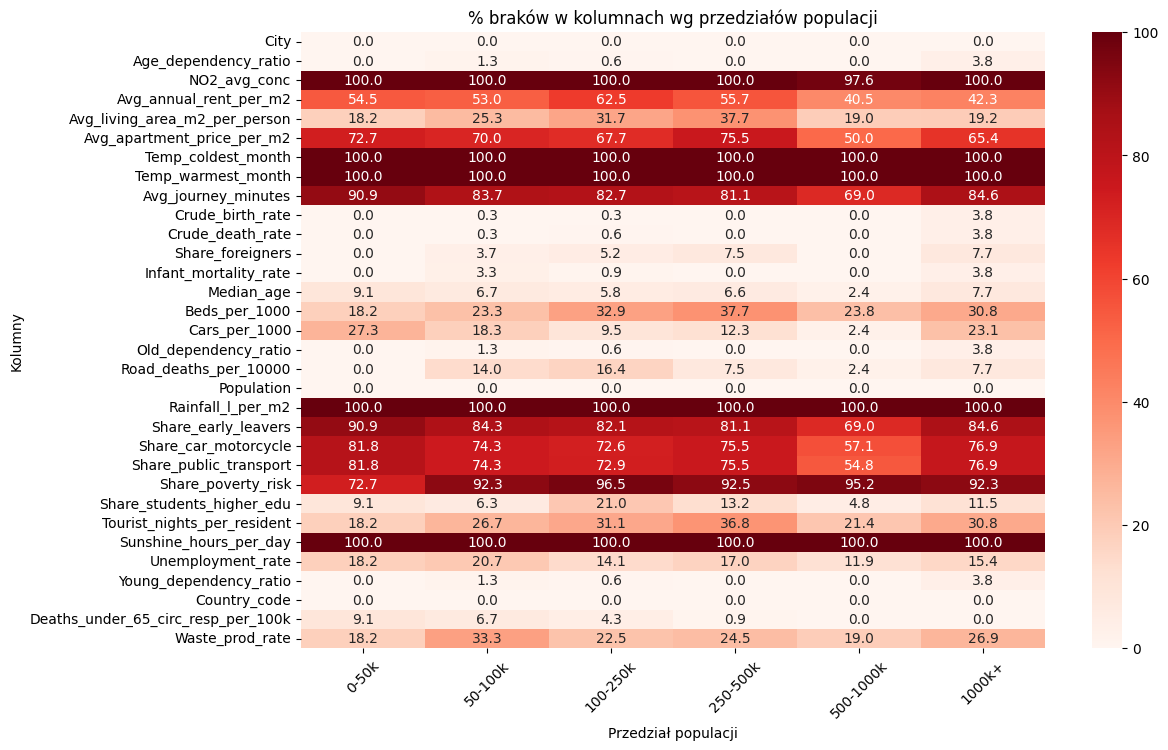

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(missing_matrix.T, annot=True, fmt=".1f", cmap="Reds")  # .T = transpozycja
plt.title("% braków w kolumnach wg przedziałów populacji")
plt.xlabel("Przedział populacji")
plt.ylabel("Kolumny")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

Część zmiennych nie nadaje się do dalszej analizy ze względu na całkowity lub niemal całkowity brak danych. Kilka innych, choć potencjalnie istotnych z punktu widzenia analizy warunków życia (m.in. stan transportu publicznego, warunki pogodowe czy jakość powietrza), również musi zostać odrzuconych, ponieważ odsetek braków sięgający 70–80% uniemożliwia przeprowadzenie sensownej imputacji.

In [7]:
threshold = 0.5  # 50%
df = df.loc[:, df.isna().mean() <= threshold]

In [8]:
sns.set_style("white")

# wybór tylko kolumn numerycznych
num_cols = df.select_dtypes(include='number').columns

h_per_plot = 2.5

fig, axes = plt.subplots(
    nrows=len(num_cols),
    ncols=1,
    figsize=(10, h_per_plot * len(num_cols)),
    constrained_layout=True
)

# gdy jest tylko jedna kolumna
if len(num_cols) == 1:
    axes = [axes]

for ax, col in zip(axes, num_cols):
    ax.hist(
        df[col].dropna(),
        bins=30,
        color='#223A5E',
        alpha=1
    )
    ax.set_title(col, fontsize=10)
    ax.set_ylabel("Count")
    sns.despine(ax=ax)

axes[-1].set_xlabel("Value")

out = widgets.Output(
    layout=widgets.Layout(
        height='600px',
        overflow='auto',
        border='1px solid lightgray'
    )
)

with out:
    plt.show()

display(out)

Output(layout=Layout(border_bottom='1px solid lightgray', border_left='1px solid lightgray', border_right='1px…

## Ocena przydatności zmiennych do imputacji braków danych

W procesie eksploracji danych dokonano selekcji zmiennych pod kątem możliwości wiarygodnej imputacji braków. Do dalszej analizy pozostawiono zmienne demograficzne, zdrowotne oraz związane z rynkiem pracy, charakteryzujące się relatywnie stabilnymi rozkładami oraz umiarkowanym poziomem braków danych. Zmienne infrastrukturalne, sektorowe oraz silnie zależne od skali miasta zostały odrzucone, ponieważ ich braki danych nie mają charakteru losowego lub poziom braków uniemożliwia sensowną imputację bez wprowadzania sztucznej struktury do zbioru.

In [9]:
# Zmienne odrzucone z analizy (brak sensownej imputacji)
cols_to_drop = [
    'Municipal_waste_1000t',
    'Deaths_under_65_circulatory_respiratory',
    'Beds_per_1000',
    'Tourist_nights_per_resident',
    'Waste_prod_rate',
    'pop_group'
]

# Usunięcie kolumn (bez błędu, jeśli którejś nie ma)
df = df.drop(columns=cols_to_drop, errors='ignore')

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age_dependency_ratio,835.0,66.218443,8.854913,41.20,60.900000,65.900000,72.00000,1.309000e+02
Avg_living_area_m2_per_person,606.0,37.385429,10.413019,14.10,29.000000,39.130000,46.00000,5.650000e+01
Crude_birth_rate,851.0,9.033173,2.778824,0.01,7.230000,8.980000,10.56500,4.229000e+01
Crude_death_rate,876.0,10.448767,2.948422,0.38,8.540000,10.415000,12.27000,1.961000e+01
Share_foreigners,799.0,10.409512,8.191818,0.00,4.100000,9.100000,14.85000,5.820000e+01
Infant_mortality_rate,840.0,3.696149,2.319722,0.00,2.180000,3.475000,4.78250,1.528000e+01
Median_age,828.0,42.316184,4.341769,17.00,39.800000,42.700000,45.10000,5.420000e+01
Cars_per_1000,739.0,495.150338,198.228303,72.06,415.560000,469.260000,534.70000,4.620040e+03
Old_dependency_ratio,835.0,32.204192,7.200577,4.50,27.600000,31.900000,36.15000,6.950000e+01
Road_deaths_per_10000,743.0,0.286110,0.268203,0.00,0.130000,0.220000,0.37000,2.200000e+00


# DATA IMPUTATION

Braki danych uzupełniono z wykorzystaniem kilku metod imputacji, dobranych w zależności od charakteru zmiennych. Dla zmiennych z marginalnym udziałem braków zastosowano imputację średnią lub medianą. Zmienne zależne od podobieństwa pomiędzy miastami imputowano metodą KNN, natomiast dla cech o bardziej złożonych zależnościach wielowymiarowych użyto imputacji iteracyjnej (MICE). W przypadku zmiennych o silnie skośnych rozkładach zastosowano dodatkowo transformację logarytmiczną, co pozwoliło ustabilizować proces imputacji i ograniczyć wpływ wartości ekstremalnych.

In [11]:
df_before = df.copy()

In [12]:
# Lista zmiennych według metody imputacji
mean_vars = ["Infant_mortality_rate", "Crude_birth_rate", "Crude_death_rate"]
median_vars = ["Median_age"]
knn_vars = ["Share_foreigners", "Unemployment_rate"]
mice_log_vars = ["Cars_per_1000", "Population", "Share_students_higher_edu", "Road_deaths_per_10000"]
mice_vars = ["Age_dependency_ratio", "Old_dependency_ratio", "Young_dependency_ratio",
             "Avg_living_area_m2_per_person", "Deaths_under_65_circ_resp_per_100k"]

In [13]:
# Log-transformacja dla wybranych zmiennych
df_log = df.copy()
for col in mice_log_vars:
    df_log[col] = np.log1p(df_log[col])  # log1p obsłuży zera

In [14]:
# Imputacja średnią
if mean_vars:
    mean_imputer = SimpleImputer(strategy="mean")
    df[mean_vars] = mean_imputer.fit_transform(df[mean_vars])

# Imputacja medianą
if median_vars:
    median_imputer = SimpleImputer(strategy="median")
    df[median_vars] = median_imputer.fit_transform(df[median_vars])

# Imputacja KNN
if knn_vars:
    scaler_knn = StandardScaler()
    knn_scaled = scaler_knn.fit_transform(df[knn_vars])
    knn_imputer = KNNImputer(n_neighbors=5)
    knn_imputed = knn_imputer.fit_transform(knn_scaled)
    df[knn_vars] = scaler_knn.inverse_transform(knn_imputed)

# Imputacja MICE (IterativeImputer)
all_mice_vars = mice_vars + mice_log_vars
scaler_mice = StandardScaler()
mice_scaled = scaler_mice.fit_transform(df_log[all_mice_vars])
mice_imputer = IterativeImputer(random_state=42, max_iter=20)
mice_imputed = mice_imputer.fit_transform(mice_scaled)

In [15]:
# wracamy do oryginalnej skali
df_log[all_mice_vars] = scaler_mice.inverse_transform(mice_imputed)

# Cofnięcie log-transformacji
for col in mice_log_vars:
    df[col] = np.expm1(df_log[col])  # odwrotność log1p

# Kopiowanie zmiennych MICE do finalnego df
for col in mice_vars:
    df[col] = df_log[col]

In [16]:
# Sprawdzenie braków
print("Braki po imputacji:")
print(df.isna().sum())

Braki po imputacji:
City                                  0
Age_dependency_ratio                  0
Avg_living_area_m2_per_person         0
Crude_birth_rate                      0
Crude_death_rate                      0
Share_foreigners                      0
Infant_mortality_rate                 0
Median_age                            0
Cars_per_1000                         0
Old_dependency_ratio                  0
Road_deaths_per_10000                 0
Population                            0
Share_students_higher_edu             0
Unemployment_rate                     0
Young_dependency_ratio                0
Country_code                          0
Deaths_under_65_circ_resp_per_100k    0
dtype: int64


In [17]:
df

,City,Age_dependency_ratio,Avg_living_area_m2_per_person,Crude_birth_rate,Crude_death_rate,Share_foreigners,Infant_mortality_rate,Median_age,Cars_per_1000,Old_dependency_ratio,Road_deaths_per_10000,Population,Share_students_higher_edu,Unemployment_rate,Young_dependency_ratio,Country_code,Deaths_under_65_circ_resp_per_100k
0,'s-Gravenhage,61.1,49.30000,9.64,8.38,19.400000,3.06,37.0,367.250000,26.0,0.170000,813669.000000,64.800000,5.270000,35.2,NL,21.138817
1,'s-Hertogenbosch,63.8,38.70971,9.88,9.45,6.500000,1.89,40.0,546.450000,29.8,0.130000,160757.000000,37.100000,2.530000,34.0,NL,28.614617
2,A Coruña,67.9,37.12000,5.57,10.58,7.600000,4.35,48.3,427.690000,40.9,0.120000,247350.000000,98.300000,10.450000,27.0,ES,27.895694
3,Aachen,54.1,46.50000,8.18,10.20,22.300000,2.91,37.0,381.900000,28.1,0.120000,252136.000000,229.600000,5.630000,25.5,DE,39.661135
4,Aalborg,63.5,48.70000,11.86,10.62,10.409512,2.61,39.7,424.389117,27.6,0.183559,188336.313756,75.851431,8.321792,36.0,DK,18.042179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,České Budějovice,68.4,23.65000,10.45,12.27,3.000000,5.12,43.4,611.043306,35.5,1.170000,93426.000000,142.000000,5.232000,32.9,CZ,50.307195
922,Łomża,55.5,25.00000,8.14,11.53,0.200000,4.07,40.8,523.170000,24.7,0.170000,60468.000000,44.000000,6.684000,30.9,PL,33.075346
923,Łódź,65.2,28.50000,8.17,18.18,0.200000,3.13,44.9,644.850000,38.1,0.230000,664860.000000,68.100000,6.684000,27.1,PL,81.520922
924,Šiauliai,62.8,25.20000,5.57,11.36,11.500000,3.25,43.0,420.650000,31.8,0.270000,110331.000000,28.900000,6.230000,31.0,LT,63.445451


In [18]:
# Wybór kolumn numerycznych (bez identyfikatorów)
num_cols = df.select_dtypes(include='number').columns

# Statystyki przed imputacją
stats_before = (
    df_before[num_cols]
    .agg(['mean', 'std', 'min', 'max'])
    .T
    .add_suffix('_before')
)

# Statystyki po imputacji
stats_after = (
    df[num_cols]
    .agg(['mean', 'std', 'min', 'max'])
    .T
    .add_suffix('_after')
)

# Połączenie w jedną tabelę
comparison_table = pd.concat([stats_before, stats_after], axis=1)

comparison_table['mean_change_%'] = (
    (comparison_table['mean_after'] - comparison_table['mean_before'])
    / comparison_table['mean_before'] * 100
)

comparison_table['std_change_%'] = (
    (comparison_table['std_after'] - comparison_table['std_before'])
    / comparison_table['std_before'] * 100
)

comparison_table

,mean_before,std_before,min_before,max_before,mean_after,std_after,min_after,max_after,mean_change_%,std_change_%
Age_dependency_ratio,66.218443,8.854913,41.20,1.309000e+02,66.218828,8.408076,4.120000e+01,1.309000e+02,5.811064e-04,-5.046214
Avg_living_area_m2_per_person,37.385429,10.413019,14.10,5.650000e+01,37.585680,8.726612,1.410000e+01,5.650000e+01,5.356381e-01,-16.195181
Crude_birth_rate,9.033173,2.778824,0.01,4.229000e+01,9.033173,2.663788,1.000000e-02,4.229000e+01,1.966482e-14,-4.139741
Crude_death_rate,10.448767,2.948422,0.38,1.961000e+01,10.448767,2.867628,3.800000e-01,1.961000e+01,0.000000e+00,-2.740247
Share_foreigners,10.409512,8.191818,0.00,5.820000e+01,10.409512,7.608707,0.000000e+00,5.820000e+01,1.706475e-14,-7.118209
Infant_mortality_rate,3.696149,2.319722,0.00,1.528000e+01,3.696149,2.209256,0.000000e+00,1.528000e+01,0.000000e+00,-4.762033
Median_age,42.316184,4.341769,17.00,5.420000e+01,42.356803,4.107034,1.700000e+01,5.420000e+01,9.599136e-02,-5.406429
Cars_per_1000,495.150338,198.228303,72.06,4.620040e+03,495.393724,179.393771,7.206000e+01,4.620040e+03,4.915397e-02,-9.501434
Old_dependency_ratio,32.204192,7.200577,4.50,6.950000e+01,32.204939,6.837222,4.500000e+00,6.950000e+01,2.320554e-03,-5.046193
Road_deaths_per_10000,0.286110,0.268203,0.00,2.200000e+00,0.282943,0.241284,-2.775558e-17,2.200000e+00,-1.106966e+00,-10.036752


Porównanie statystyk opisowych przed i po imputacji wskazuje, że proces uzupełniania braków danych nie wprowadził istotnych zniekształceń w rozkładach zmiennych. Dla większości cech zmiana wartości średniej nie przekracza 1%, a największe przesunięcia (do ok. 7%) dotyczą zmiennych o wysokiej skośności i relatywnie dużym udziale braków, imputowanych metodą MICE z transformacją logarytmiczną.

We wszystkich przypadkach obserwowany jest umiarkowany spadek odchylenia standardowego (2–16%), co jest typowym i oczekiwanym efektem imputacji, wynikającym z częściowego wygładzenia rozkładów. Wartości minimalne i maksymalne pozostały niezmienione, co potwierdza, że imputacja nie wygenerowała sztucznych obserwacji ani ekstremów.

Na tej podstawie można uznać, że zastosowane metody imputacji zachowały ogólną strukturę danych i są odpowiednie do dalszej analizy klasteryzacyjnej.

# FURTHER EXPLORATION

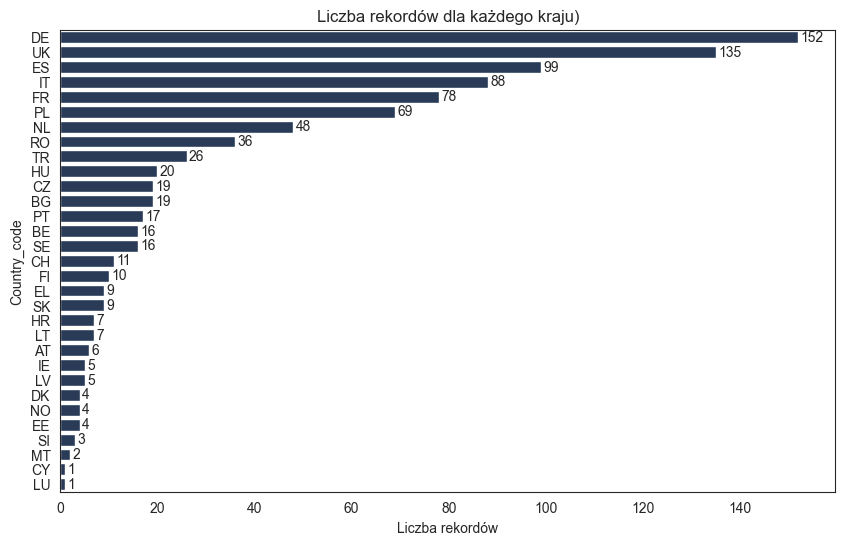

In [19]:
# Obliczamy liczność i sortujemy malejąco
counts = df['Country_code'].value_counts().sort_values(ascending=False)

# Tworzymy wykres poziomy
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=counts.values, y=counts.index, color='#223A5E')

# Dodajemy etykiety liczności na końcach słupków
for i, value in enumerate(counts.values):
    ax.text(value + 0.5, i, str(value), va='center') 

plt.title('Liczba rekordów dla każdego kraju)')
plt.xlabel('Liczba rekordów')

plt.show()

Analiza liczby miast według kraju pokazuje naturalną nierównomierność w reprezentacji: Niemcy, Wielka Brytania, Hiszpania i Włochy mają najwięcej miast w zbiorze, natomiast wiele małych państw, takich jak Cypr, Luksemburg czy Malta, ma tylko 1–2 miasta. Jest to odzwierciedlenie rzeczywistej wielkości i struktury administracyjnej krajów, a nie braków w danych.

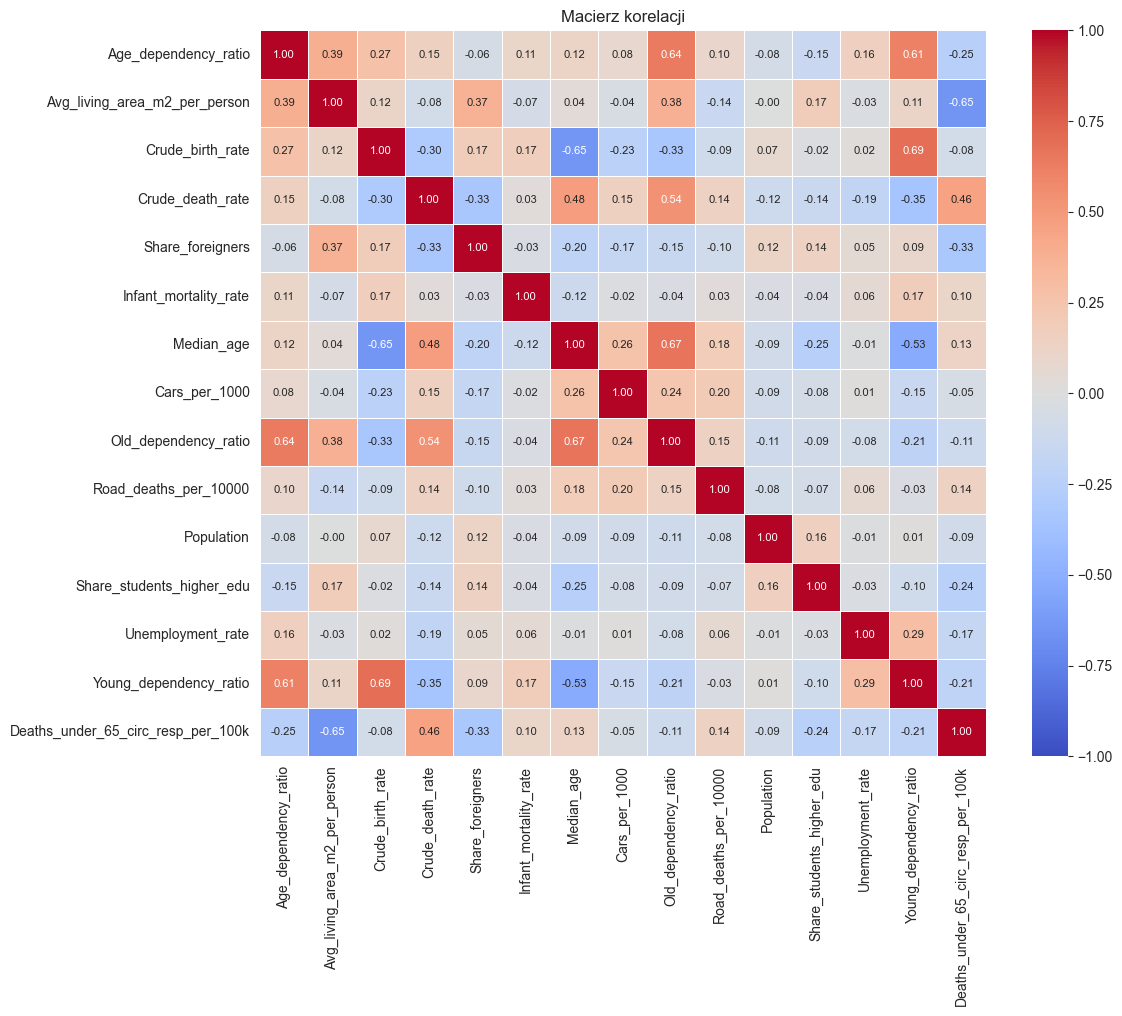

In [20]:
df_num = df.drop(['City', 'Country_code'], axis=1)
corr = df_num.corr(method='pearson')

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    cmap='coolwarm',
    center=0,
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=0.5,
    annot=True,
    fmt=".2f",
    annot_kws={"size": 8}
)

plt.title("Macierz korelacji")
plt.tight_layout()
plt.show()

Najpierw należy przyjrzeć się grupie skorelowanych ze sobą zmiennych demograficznych.

In [21]:
demog_corr = df[['Age_dependency_ratio', 'Crude_birth_rate',  'Crude_death_rate', 'Median_age', 'Old_dependency_ratio', 'Young_dependency_ratio']].corr()
demog_corr

,Age_dependency_ratio,Crude_birth_rate,Crude_death_rate,Median_age,Old_dependency_ratio,Young_dependency_ratio
Age_dependency_ratio,1.000000,0.273332,0.152919,0.123947,0.639872,0.613534
Crude_birth_rate,0.273332,1.000000,-0.300149,-0.645197,-0.329228,0.689008
Crude_death_rate,0.152919,-0.300149,1.000000,0.480827,0.535486,-0.352533
Median_age,0.123947,-0.645197,0.480827,1.000000,0.669360,-0.530387
Old_dependency_ratio,0.639872,-0.329228,0.535486,0.669360,1.000000,-0.213554
Young_dependency_ratio,0.613534,0.689008,-0.352533,-0.530387,-0.213554,1.000000


In [22]:
df = df.drop(['Young_dependency_ratio', 'Crude_death_rate', 'Age_dependency_ratio', 'Median_age', 'Deaths_under_65_circ_resp_per_100k'], axis=1)

In [23]:
df.drop(['City', 'Country_code'], axis=1).corr()

,Avg_living_area_m2_per_person,Crude_birth_rate,Share_foreigners,Infant_mortality_rate,Cars_per_1000,Old_dependency_ratio,Road_deaths_per_10000,Population,Share_students_higher_edu,Unemployment_rate
Avg_living_area_m2_per_person,1.000000,0.116280,0.372241,-0.068247,-0.042920,0.377741,-0.140840,-0.004046,0.173583,-0.027688
Crude_birth_rate,0.116280,1.000000,0.173067,0.165277,-0.230960,-0.329228,-0.094107,0.072336,-0.020577,0.016053
Share_foreigners,0.372241,0.173067,1.000000,-0.034041,-0.167205,-0.154075,-0.097399,0.120078,0.137555,0.052743
Infant_mortality_rate,-0.068247,0.165277,-0.034041,1.000000,-0.020422,-0.038516,0.027984,-0.035258,-0.038332,0.059567
Cars_per_1000,-0.042920,-0.230960,-0.167205,-0.020422,1.000000,0.237000,0.200154,-0.093481,-0.076568,0.008261
Old_dependency_ratio,0.377741,-0.329228,-0.154075,-0.038516,0.237000,1.000000,0.145919,-0.107877,-0.089345,-0.084987
Road_deaths_per_10000,-0.140840,-0.094107,-0.097399,0.027984,0.200154,0.145919,1.000000,-0.082461,-0.074407,0.063482
Population,-0.004046,0.072336,0.120078,-0.035258,-0.093481,-0.107877,-0.082461,1.000000,0.159114,-0.009467
Share_students_higher_edu,0.173583,-0.020577,0.137555,-0.038332,-0.076568,-0.089345,-0.074407,0.159114,1.000000,-0.027426
Unemployment_rate,-0.027688,0.016053,0.052743,0.059567,0.008261,-0.084987,0.063482,-0.009467,-0.027426,1.000000


# DATA STANDARIZATION

Dane zostały ustandaryzowane (średnia = 0, odchylenie standardowe = 1), ponieważ algorytm K-means opiera się na odległościach i jest wrażliwy na różnice skali pomiędzy zmiennymi.

In [24]:
num_vars = [
    'Avg_living_area_m2_per_person', 'Crude_birth_rate',
    'Share_foreigners', 'Infant_mortality_rate',
    'Cars_per_1000', 'Old_dependency_ratio', 'Road_deaths_per_10000',
    'Population', 'Share_students_higher_edu', 'Unemployment_rate'
]

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[num_vars] = scaler.fit_transform(df[num_vars])

In [25]:
df.to_csv('../data/processed/processed_data_unscaled.csv', index=False)
df_scaled.to_csv('../data/processed/processed_data_scaled.csv', index=False)